# Build a song recommender system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load some music data

In [2]:
song_data =pd.read_csv('Dataset/song_data.csv')

In [3]:
song_data

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters
...,...,...,...,...,...,...
1116604,276e43ad698705e5011e5091f367d951b21246f5,SOWTYVO12AB0180BDA,8,Surf Wax America,Weezer,Surf Wax America - Weezer
1116605,276e43ad698705e5011e5091f367d951b21246f5,SOWZHOY12A6701F9FC,1,Kill The King,Megadeth,Kill The King - Megadeth
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,You Think I Ain't Worth A Dollar_ But I Feel L...,Queens Of The Stone Age,You Think I Ain't Worth A Dollar_ But I Feel L...
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Superbeast,Rob Zombie,Superbeast - Rob Zombie


In [4]:
len(song_data)

1116609

In [5]:
song_data.describe()

,listen_count
count,1.116609e+06
mean,3.290769e+00
std,7.202534e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.200000e+02


## Show the most popular songs in the dataset

In [6]:
#song_data['song'].show()
popular_song=pd.DataFrame(song_data['song'].value_counts().items(), columns=['song', 'count'])

In [7]:
popular_song

,song,count
0,Sehr kosmisch - Harmonia,5970
1,Undo - Björk,5281
2,You're The One - Dwight Yoakam,4806
3,Dog Days Are Over (Radio Edit) - Florence + Th...,4536
4,Revelry - Kings Of Leon,4339
...,...,...
9947,Accidntel Deth (Album Version) - Rilo Kiley,16
9948,Trahison - Vitalic,15
9949,Marching Theme - Neutral Milk Hotel,15
9950,Younger Than Springtime - William Tabbert,12


In [8]:
popular_song.head(10)

,song,count
0,Sehr kosmisch - Harmonia,5970
1,Undo - Björk,5281
2,You're The One - Dwight Yoakam,4806
3,Dog Days Are Over (Radio Edit) - Florence + Th...,4536
4,Revelry - Kings Of Leon,4339
5,Horn Concerto No. 4 in E flat K495: II. Romanc...,3949
6,Secrets - OneRepublic,3916
7,Tive Sim - Cartola,3185
8,Fireflies - Charttraxx Karaoke,3171
9,Hey_ Soul Sister - Train,3132


# Count the number of unique users in the data

In [35]:
users = song_data['user_id'].unique()

In [10]:
len(users)

66346

In [11]:
songs = song_data['song'].unique()

In [12]:
len(songs)

9952

# Create a song recommender

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_data, test_data = train_test_split(song_data, test_size = 0.20, random_state=0)

In [15]:
train_data

,user_id,song_id,listen_count,title,artist,song
308223,4c1ea8245b67c2862e12f02b78e345cc7bdd7282,SOWVRVI12A6701E0B4,7,Outshined,Soundgarden,Outshined - Soundgarden
308537,6df2dd5a3bb9042da67ab82baf0727bca10ec05e,SOMEUED12A6701DBEA,1,Pump It,Black Eyed Peas,Pump It - Black Eyed Peas
234078,fd84fea1c5df235d73ebd3cf4a8c638ca1f3cfdb,SOBMCEI12A6D4F65BD,2,My Lovin' (You're Never Gonna Get It) (LP Vers...,En Vogue,My Lovin' (You're Never Gonna Get It) (LP Vers...
391502,d30183edf03302cdc25cb39798ae50a4395fa50f,SOCJAMC12A8C13F245,2,Precious Things,Tori Amos,Precious Things - Tori Amos
379458,9d4dfbd3614c1a4caab5f7fda723563befa626e8,SOJOIKI12AB0187525,1,Hero (Album Version),Skillet,Hero (Album Version) - Skillet
...,...,...,...,...,...,...
359783,243ca9574539ba638847f407e22ce0c3953ad391,SONUOOC12A8C136211,3,Heartbeat,Nneka,Heartbeat - Nneka
152315,35c63042c895bc5b198cab8e04b718469b7543ba,SOGHOUY12A8C143CB9,4,Dinosaur,Ke$ha,Dinosaur - Ke$ha
963395,109c70af3471629c753e693e741f805024b85b7d,SOKVZHI12A58A7A13E,5,Everywhere I Go,Hollywood Undead,Everywhere I Go - Hollywood Undead
117952,0de9ced79f560aa0e51c413fc54ec5d39f1e7386,SOPBFHP12A8C131F30,30,Here_ There And Everywhere,Erin Bode,Here_ There And Everywhere - Erin Bode


In [31]:
train_data_users_id = train_data['user_id'].unique()

In [32]:
len(train_data_users_id)

66116

In [16]:
test_data

,user_id,song_id,listen_count,title,artist,song
333951,8f8f909dd86e77969d1f8753e10ac56c4c68aa72,SOZXQRQ12A6701C323,2,Up Where We Belong,Joe Cocker / Jennifer Warnes,Up Where We Belong - Joe Cocker / Jennifer Warnes
492194,d5a1b1b8142327cea378f262b96ef5675c8bff99,SOZKNSB12A8C140F11,6,Replay,Iyaz,Replay - Iyaz
525465,58907ab6047361c85eb92be39dcbd2f0eb924684,SOLFBXX12A8AE47A51,1,Surfacing (Live version) (Album Version),Slipknot,Surfacing (Live version) (Album Version) - Sli...
465962,f22c0aa5308322685a42fc10fa05ea3f4a6e96b4,SOWTAVD12B0B8090C2,1,Just Like You Imagined,Nine Inch Nails,Just Like You Imagined - Nine Inch Nails
162333,3134803ece9906f87bb1b64a63058ef26c603336,SOCCEFN12A6701C548,1,Tonight (Featuring Mobb Deep & Joe Hooker)(Alb...,The Notorious B.I.G.,Tonight (Featuring Mobb Deep & Joe Hooker)(Alb...
...,...,...,...,...,...,...
15962,22b6baffe7de156c64060ebee5b3618f2aaf8c89,SOVWADY12AB0189C63,2,Party In The U.S.A.,Miley Cyrus,Party In The U.S.A. - Miley Cyrus
62745,4fd45ecbcc53725aa081527904bcfa166eb4e2c1,SOSACAB12AB01876E4,1,From The Station,Soltero,From The Station - Soltero
276130,53778a8a259574fb76b3252efb8b47e5aac5ae7a,SOFZSAT12AF72A0806,7,Youth Against Fascism,Sonic Youth,Youth Against Fascism - Sonic Youth
535667,bbcc1ebf3046eedfb94c89787b6500e8738964e4,SOIZFTE12AB0186842,1,Fuck Kitty,Frumpies,Fuck Kitty - Frumpies


In [33]:
test_data_users_id = test_data['user_id'].unique()

In [34]:
len(test_data_users_id)

58601

## Create a very simple popularity recommender

In [17]:
import Recommenders as Recommenders
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

## Use the popularity model to make some predictions


In [18]:
pm.recommend(users[0])

,user_id,song,score,Rank
7128,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,4812,1.0
9083,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,4211,2.0
9879,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,3819,3.0
2068,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,3624,4.0
6775,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,3485,5.0
3614,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,3188,6.0
7116,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,3103,7.0
8846,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,2551,8.0
2718,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,2525,9.0
3486,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,2505,10.0


In [19]:
pm.recommend(users[2])

,user_id,song,score,Rank
7128,bd4c6e843f00bd476847fb75c47b4fb430a06856,Sehr kosmisch - Harmonia,4812,1.0
9083,bd4c6e843f00bd476847fb75c47b4fb430a06856,Undo - Björk,4211,2.0
9879,bd4c6e843f00bd476847fb75c47b4fb430a06856,You're The One - Dwight Yoakam,3819,3.0
2068,bd4c6e843f00bd476847fb75c47b4fb430a06856,Dog Days Are Over (Radio Edit) - Florence + Th...,3624,4.0
6775,bd4c6e843f00bd476847fb75c47b4fb430a06856,Revelry - Kings Of Leon,3485,5.0
3614,bd4c6e843f00bd476847fb75c47b4fb430a06856,Horn Concerto No. 4 in E flat K495: II. Romanc...,3188,6.0
7116,bd4c6e843f00bd476847fb75c47b4fb430a06856,Secrets - OneRepublic,3103,7.0
8846,bd4c6e843f00bd476847fb75c47b4fb430a06856,Tive Sim - Cartola,2551,8.0
2718,bd4c6e843f00bd476847fb75c47b4fb430a06856,Fireflies - Charttraxx Karaoke,2525,9.0
3486,bd4c6e843f00bd476847fb75c47b4fb430a06856,Hey_ Soul Sister - Train,2505,10.0


## Build a song recommender with personalization

### Create an instance of item similarity based recommender class

In [20]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [22]:
#Print the songs for the user in training data
def print_user(user_id):
#user_id = users[0]
    user_items = is_model.get_user_items(user_id)
    #
    print("------------------------------------------------------------------------------------")
    print("Training data songs for the user userid: %s:" % user_id)
    print("------------------------------------------------------------------------------------")

    for user_item in user_items:
        print(user_item)

    print("----------------------------------------------------------------------")
    print("Recommendation process going on:")
    print("----------------------------------------------------------------------")

    #Recommend songs for the user using personalized model
    return is_model.recommend(user_id)

In [23]:
print_user(users[0])

------------------------------------------------------------------------------------
Training data songs for the user userid: b80344d063b5ccb3212f76538f3d9e43d87dca9e:
------------------------------------------------------------------------------------
All That We Perceive - Thievery Corporation
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Neon - John Mayer
Oh No - Andrew Bird
Clarity - John Mayer
Breakout - Foo Fighters
Mykonos - Fleet Foxes
Love Song For No One - John Mayer
The Cove - Jack Johnson
Our Swords (Soundtrack Version) - Band Of Horses
Sehr kosmisch - Harmonia
Drive - Incubus
High and dry - Jorge Drexler
Love Shack - The B-52's
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Holes To Heaven - Jack Johnson
Warning - Incubus
Country Road - Jack Johnson / Paula Fuga
Generator - Foo Fighters
Are You In? - Incubus
Stronger - Kanye West
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Champio

,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Great Indoors - John Mayer,0.014196,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Staple It Together - Jack Johnson,0.013492,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Crying Shame - Jack Johnson,0.012762,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,St. Patrick's Day - John Mayer,0.012540,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Back To You - John Mayer,0.012327,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,If I Could - Jack Johnson,0.012244,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Posters - Jack Johnson,0.012165,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The News - Jack Johnson,0.011892,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Why Georgia - John Mayer,0.011706,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,All We Ever Do Is Say Goodbye - John Mayer,0.011405,10


In [24]:
print_user(users[1])

------------------------------------------------------------------------------------
Training data songs for the user userid: 85c1f87fea955d09b4bec2e36aee110927aedf9a:
------------------------------------------------------------------------------------
The Best of Times - Sage Francis
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 1
No. of unique songs in the training set: 9952
Non zero values in cooccurence_matrix :1104


,user_id,song,score,rank
0,85c1f87fea955d09b4bec2e36aee110927aedf9a,You Know Your Boy Did That - Swizz Beatz,0.050000,1
1,85c1f87fea955d09b4bec2e36aee110927aedf9a,Big Munny - Swizz Beatz,0.044248,2
2,85c1f87fea955d09b4bec2e36aee110927aedf9a,Deception - Blackalicious,0.042553,3
3,85c1f87fea955d09b4bec2e36aee110927aedf9a,Red Hot - Jurassic 5,0.039216,4
4,85c1f87fea955d09b4bec2e36aee110927aedf9a,Work It Out - Jurassic 5 / Dave Matthews Band,0.035714,5
5,85c1f87fea955d09b4bec2e36aee110927aedf9a,Who Am I - Timbaland & Magoo,0.031579,6
6,85c1f87fea955d09b4bec2e36aee110927aedf9a,I'm Him [Explicit Album Version] - Yung Joc,0.030612,7
7,85c1f87fea955d09b4bec2e36aee110927aedf9a,There's A War Going On For Your Mind - Flobots,0.030612,8
8,85c1f87fea955d09b4bec2e36aee110927aedf9a,Jayou - Jurassic 5,0.028571,9
9,85c1f87fea955d09b4bec2e36aee110927aedf9a,Crack The Shutters - Snow Patrol,0.028112,10


## Apply personalized model to find similar songs to any song in the dataset

In [25]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

No. of unique songs in the training set: 9952
Non zero values in cooccurence_matrix :3325


,user_id,song,score,rank
0,,Love Me - Justin Bieber,0.180927,1
1,,Somebody To Love - Justin Bieber,0.175371,2
2,,One Less Lonely Girl - Justin Bieber,0.168174,3
3,,Eenie Meenie - Sean Kingston and Justin Bieber,0.165478,4
4,,One Time - Justin Bieber,0.165456,5
5,,Stuck In The Moment - Justin Bieber,0.159138,6
6,,That Should Be Me - Justin Bieber,0.153639,7
7,,Down To Earth - Justin Bieber,0.150000,8
8,,Never Let You Go - Justin Bieber,0.140691,9
9,,Overboard - Justin Bieber / Jessica Jarrell,0.136026,10


# Quantitative comparison between the models

In [38]:
import time
import Evaluation as Evaluation

start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.0001

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:58371
Length of user sample:5
Getting recommendations for user:83401af819c3e56a93ed0b731a2a47f580938c5d
No. of unique songs for the user: 5
No. of unique songs in the training set: 9952
Non zero values in cooccurence_matrix :11480
Getting recommendations for user:a0755bf3d8bd7d04a5ef6f738cccb2bae791e1f3
No. of unique songs for the user: 43
No. of unique songs in the training set: 9952
Non zero values in cooccurence_matrix :160640
Getting recommendations for user:2b05acf912083d6c194b469cc2358d5bbe5b0730
No. of unique songs for the user: 22
No. of unique songs in the training set: 9952
Non zero values in cooccurence_matrix :21465
Getting recommendations for user:4c858926f021984f3886c6434fbc01c8849d8b96
No. of unique songs for the user: 9
No. of unique songs in the training set: 9952
Non zero values in cooccurence_matrix :20823
Getting recommendations for user:6e9dcae9cca4e88faafa539637e3e90de591deca
No. of unique songs for the user: 8
No. of unique songs 

# Code to plot precision recall curve

In [39]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


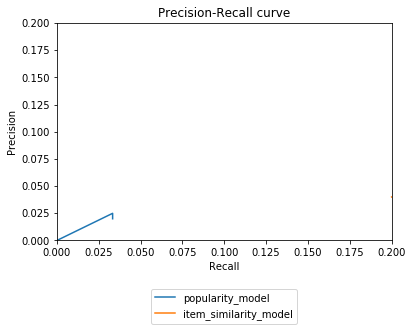

In [40]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [42]:
from sklearn.externals import joblib
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

#Read the persisted files 
pm_avg_precision_list = joblib.load('pm_avg_precision_list_3.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_3.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).


/home/dipesh/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'pm_avg_precision_list_3.pkl'